<a href="https://colab.research.google.com/github/HariharaSubramanianM/Loan-Default/blob/master/Version_2_Final_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports and Normalize

In [126]:
import pandas as pd

pdict =  pd.read_excel(r"PositiveFactors.xlsx",sheet_name=['Factor1','Factor2','Factor3','Factor4','Factor5','Factor6','Factor7','Factor9','Factor10'])
ndict =  pd.read_excel(r"NegativeFactors.xlsx",sheet_name=['FactorA','FactorB','FactorC','FactorD','FactorE','FactorF','FactorG','FactorH','FactorI'])
weights = pd.read_excel(r"factors_weight.xlsx",sheet_name=['PosWeights','NegWeights'])
responses = pd.read_excel(r"LoanSurveyResponses.xlsx")

In [127]:
PosWeights = weights.get('PosWeights').set_index('pf').T.to_dict('list')
NegWeights = weights.get('NegWeights').set_index('nf').T.to_dict('list')

In [237]:

#normalize

def normalize(d1):
  dmin=min(d1.values())[0]
  dmax=max(d1.values())[0]
  for key in d1:
    d1[key]=((d1[key][0]-dmin)/(dmax-dmin))*10
  return d1


In [238]:
#Range Dict
class RangeDict(dict):
    def __getitem__(self, item):
        if not isinstance(item, range): 
            for key in self:
                if item in key:
                    return self[key]
            raise KeyError(item)
        else:
            return super().__getitem__(item)




In [239]:
def rangegen(d):
  ret=RangeDict({})
  for key,value in d.items():
    start,end = [int(i) for i in key.split('-')]
    dtemp = RangeDict({range(start,end+1):value})     # left value inclusive, right value exclusive
    ret.update(dtemp)
  return ret


# Find Positive Score

In [240]:
p1 = normalize(pdict.get('Factor1').set_index('F1').T.to_dict('list'))
p2 = normalize(pdict.get('Factor2').set_index('F2').T.to_dict('list'))
p3 = normalize(pdict.get('Factor3').set_index('F3').T.to_dict('list'))
p4 = normalize(pdict.get('Factor4').set_index('F4').T.to_dict('list'))
p5 = normalize(pdict.get('Factor5').set_index('F5').T.to_dict('list'))
p6 = normalize(pdict.get('Factor6').set_index('F6').T.to_dict('list'))
p7 = normalize(pdict.get('Factor7').set_index('F7').T.to_dict('list'))
p9 = normalize(pdict.get('Factor9').set_index('F9').T.to_dict('list'))
p10 =normalize(pdict.get('Factor10').set_index('F10').T.to_dict('list'))


# Range Dicts
# p4 = rangegen(normalize(pdict.get('Factor4').set_index('F4').T.to_dict('list')))
# p7 = rangegen(normalize(pdict.get('Factor7').set_index('F7').T.to_dict('list')))

In [241]:
def find_pos_score(naac=None,current_course=None,upskill_course=None,marks10=None,marks12=None,city=None,medium=None,rank=None,parent_edu=None,board=None):
    
    Weights = [4.5,5,4.5,4,4,4,4,4.5,3.5,4]
    FactorResults = [0,0,0,0,0,0,0,0,0,0]
    val = [naac,current_course,upskill_course,marks10,marks12,city,medium,rank,parent_edu,board]
    
    exprlist=['p1[naac]','p2[current_course.strip()]','p3[upskill_course.strip()]','p4[marks10]','p4[marks12]','p5[city]','p6[medium.strip()]','p7[rank]','p9[parent_edu.strip()]','p10[board.strip()]']
    totalinputs=0
    for i in range(len(val)):
        if val[i]==None:            
            Weights[i]=0
        else:
            totalinputs+=1
            FactorResults[i]=eval(exprlist[i])
            
    wsum = sum(Weights)
    Weights = [i/wsum for i in Weights]
    
    score=0
    for i in range(len(FactorResults)):
        score+=Weights[i]*FactorResults[i]    
    score = round(score,2)
    return [score,totalinputs]

In [242]:
# [pos_score,totalinputs] = find_pos_score(naac="A+",current_course="BE in CS",upskill_course="IT",marks10='91-100',marks12='91-100',medium='English',rank='61-80',parent_edu='Graduate',board='State')
# print(pos_score)
# print(totalinputs)

In [247]:
responses.drop(columns=['Timestamp'],inplace=True)

In [244]:
factorlist = ['naac','current_course','upskill_course','marks10','marks12','city','medium','rank','parent_edu','board']
scores=[]
for j in range(responses.shape[0]):
  fps = [] #functionparameters
  for i in range(len(factorlist)):
    try:
      fps.append(responses[factorlist[i]][j].upper().strip())    
    except KeyError:
      fps.append(None)
  [a,b] = find_pos_score(naac=fps[0],current_course=fps[1],upskill_course=fps[2],marks10=fps[3],marks12=fps[4],city=fps[5],medium=fps[6],rank=fps[7],parent_edu=fps[8],board=fps[9])
  scores.append(a)

In [245]:
print(scores)

[6.84, 9.46, 7.61, 9.36, 9.57, 8.1, 9.25, 6.99, 5.51, 7.23, 8.57, 7.49, 7.57, 6.79, 7.7, 8.72, 8.98, 7.03, 7.31, 5.17, 9.79, 8.45, 7.92, 7.28, 7.09, 6.64, 7.07, 7.92, 7.71, 7.82, 8.14, 7.07, 7.38, 6.35, 7.85, 8.37, 7.07, 8.88, 9.25, 8.99, 7.92, 8.25, 9.2, 7.59, 5.8, 4.1, 4.1, 7.71, 6.35, 7.71, 7.2, 6.44, 7.28, 8.61, 7.65, 6.9, 9.74, 6.11, 8.72, 7.61, 7.39, 7.29, 6.22, 6.44, 8.97, 8.08, 7.06, 7.18, 5.06, 7.18, 6.66, 6.87, 6.96, 5.48, 6.85, 6.76, 6.73, 7.92, 6.23, 6.42, 7.28, 6.72, 9.32, 5.78, 7.44, 5.89, 6.52, 9.14, 8.75, 9.18, 9.62, 7.9, 8.51, 9.39, 6.86, 9.83, 9.39, 9.39, 9.09, 7.29, 6.7, 6.75, 7.6, 9.19, 7.65, 7.47, 6.09]


In [246]:
cgpa=[]
for i in responses['cgpa']:
  start,end = [int(x) for x in i.split('-')]
  cgpa.append((start+end)/2)
print(cgpa)

[78.0, 95.5, 85.5, 95.5, 85.5, 78.0, 85.5, 73.0, 73.0, 55.0, 73.0, 95.5, 73.0, 65.5, 85.5, 55.0, 55.0, 65.5, 78.0, 73.0, 78.0, 78.0, 95.5, 78.0, 85.5, 85.5, 85.5, 85.5, 85.5, 95.5, 85.5, 85.5, 85.5, 85.5, 85.5, 85.5, 85.5, 95.5, 85.5, 85.5, 85.5, 85.5, 85.5, 85.5, 85.5, 78.0, 78.0, 85.5, 73.0, 85.5, 95.5, 85.5, 85.5, 85.5, 95.5, 85.5, 85.5, 78.0, 78.0, 78.0, 85.5, 78.0, 65.5, 65.5, 85.5, 85.5, 65.5, 85.5, 73.0, 85.5, 73.0, 85.5, 65.5, 78.0, 85.5, 65.5, 78.0, 65.5, 85.5, 55.0, 78.0, 73.0, 85.5, 85.5, 85.5, 78.0, 85.5, 78.0, 85.5, 78.0, 85.5, 78.0, 85.5, 95.5, 95.5, 95.5, 95.5, 85.5, 78.0, 73.0, 65.5, 78.0, 85.5, 78.0, 73.0, 85.5, 55.0]


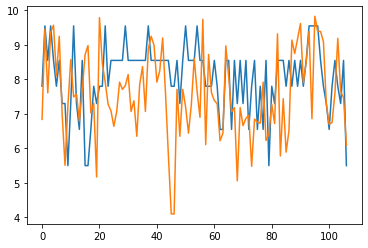

In [248]:
import matplotlib.pyplot as plt
cgpagraph = [x/10 for x in cgpa]
plt.plot(cgpagraph)
plt.plot(scores)
plt.show()

In [249]:
combined = zip(scores,cgpa)
combinedlist = list(combined)
combinedlist = sorted(combinedlist)
len(combinedlist)

107

In [250]:
scorebucket=[]
cgpabucket=[]
for j in range(0,100,10):
  scoresum=0
  cgpasum=0
  for i in combinedlist[j:j+10]:
    scoresum+=i[0]
    cgpasum+=i[1]

  scorebucket.append(scoresum/10)
  cgpabucket.append(cgpasum/100)


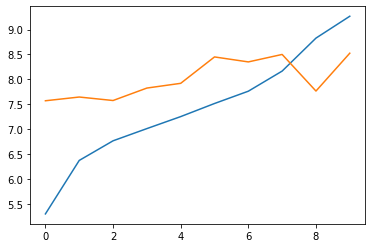

In [251]:
plt.plot(scorebucket)
plt.plot(cgpabucket)
plt.show()


# Find Negative Score

import json
import urllib
import requests

url = 'https://parseapi.back4app.com/classes/india_cities_database?limit=3369&order=ascii_name&keys=ascii_name,population'
headers = {
    'X-Parse-Application-Id': 'k9wzhXDJckHtuuKmMEm8hceXoCZMvxN4CTijZOjn', # This is the fake app's application id
    'X-Parse-Master-Key': 'EpjKI6bUlgkIbOAAUaDKDFj6x2C3AnsZZJqoa4ak' # This is the fake app's readonly master key
}
data = json.loads(requests.get(url, headers=headers).content.decode('utf-8')) # Here you have the data that you need

city=[]
population=[]

for i in data["results"]:
  city.append(i["ascii_name"])
  population.append(i["population"])

cityapi=df = pd.DataFrame(list(zip(city, population)),columns =['City', 'Population'])
filename='CityAPI.xlsx'
cityapi.to_excel(filename)


In [ ]:
# Negative Factor - A
def city_range_gen(d):
  ret=RangeDict({})

  # ref : https://www.rbi.org.in/scripts/bs_viewcontent.aspx?Id=2035#:~:text=Rural%3A%20population%20less%20than%2010%2C000,Metropolitan%3A%2010%20lakh%20and%20above

  city_pop_range={'Rural':[0,10000],'Semi Urban':[10000,100000],'Urban':[100000,1000000],'Metropolitan':[1000000,2000000000]} #2000000000 is rounded max int range
  for key,value in d.items():
    start,end = city_pop_range[key]
    dtemp = RangeDict({range(start,end):value})
    ret.update(dtemp)
  return ret

In [ ]:
# Negative Factor - C
def bor_mar(totamt,getamt,perc):
  diff = totamt-getamt
  rel_diff = (diff/totamt)*100
  risk_val = 10 - rel_diff*(perc/100)
  return risk_val

In [ ]:
n2 = normalize(ndict.get('FactorB').set_index('FB').T.to_dict('list'))                   #Marital Status
n8 = normalize(ndict.get('FactorH').set_index('FH').T.to_dict('list'))                   #Aadhar with KYC

#RangeDict
n1 = city_range_gen(normalize(ndict.get('FactorA').set_index('FA').T.to_dict('list')))   #city_range_gen(normalize( {'Metropolitan': [7], 'Rural': [8], 'Semi Urban': [5], 'Urban': [6]} ))
n6 = rangegen(normalize(ndict.get('FactorF').set_index('FF').T.to_dict('list')))         #Loan Amount
n7 = rangegen(normalize(ndict.get('FactorG').set_index('FG').T.to_dict('list')))         #Repayment Period
n9 = rangegen(normalize(ndict.get('FactorI').set_index('FI').T.to_dict('list')))         #Age


#Custom Number
n3 = ndict.get('FactorC').set_index('FC').T.to_dict('list')['Margin'][0]                  #Borrower Margin
n4 = ndict.get('FactorD').set_index('FD').T.to_dict('list')['SecurityRatio'][0]           #Security or Not
n5 = ndict.get('FactorE').set_index('FE').T.to_dict('list')['MaletoFemale'][0]            #gender

In [ ]:
securitydict={"Yes":10/n4, "No":10}
genderdict={"Male":10/n5,"Female":10}

# Calculate Final Score

FINAL SCORE CALCULATION

min positive = 5.98
min negative = 6.0 

max pos-neg = 10-6 = 4
min pos-neg = -4.02

range = 8.02

final value = [ (val+4.02)/8.02 ] * 10

# Positive Score

In [ ]:
PosWeights

{'p1': [4.5],
 'p10': [4.0],
 'p2': [5.0],
 'p3': [4.5],
 'p4': [4.0],
 'p5': [4.0],
 'p6': [4.0],
 'p7': [4.5],
 'p9': [3.5]}

0        A
1      A++
2        A
3      A++
4      A++
      ... 
102      A
103     A+
104    A++
105     A+
106     A+
Name: naac, Length: 107, dtype: object

# Risk Score

In [ ]:
def find_neg_score(region,mar_status,bow_margin,security,gender,amount,period,kyc,age):
    fA = n1[citypops.loc[region].Population]
    fB = n2[mar_status]
    fC = bor_mar(bow_margin,amount,n3)
    fD = securitydict[security]
    fE = genderdict[gender]
    fF = n6[amount]
    fG = n7[period]
    fH = n8[kyc]
    fI = n9[age]
    W1,W2,W3,W4,W5,W6,W7,W8,W9 = 3.5,3.5,5,5,4,4.5,4,5,4
    S=38.5
    w1,w2,w3,w4,w5,w6,w7,w8,w9 = W1/S,W2/S,W3/S,W4/S,W5/S,W6/S,W7/S,W8/S,W9/S
    score = w1*fA + w2*fB + w3*fC + w4*fD + w5*fE + w6*fF + w7*fG + w8*fH + w9*fI
    score = round(score,2)
    return score

In [ ]:
neg_score = find_neg_score("Chennai","No",1000000,"Yes","Male",800000,10,"Yes",21)
print(neg_score)

7.31


# Final Score

In [ ]:
final_score = ((pos_score-neg_score+4.02)/8.02)*10
print(final_score)

7.8428927680798015
